In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/loan_data.csv')

In [3]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

fearures seperate

In [4]:
num_val = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
cat_val = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_pipeline

In [6]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline

In [7]:
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

coloum transformer

In [8]:
column_transformer = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_val),
    ('cat_pipeline', cat_pipeline, cat_val)
])

In [9]:
x = column_transformer.fit_transform(X)

!train test validation

In [10]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=467)


train and validation

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=467)

**model training**

In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=10, solver='liblinear',max_iter=100)
LR.fit(X_train, y_train)
print(f'{LR.score(X_val, y_val)}')

0.8956666666666667


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = LR.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6601  462]
 [ 463 1474]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7063
           1       0.76      0.76      0.76      1937

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



#retrain the model

In [14]:
LR.fit(X_train_val, y_train_val)

LogisticRegression(C=10, solver='liblinear')

In [61]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = LR.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8964444444444445
[[6603  460]
 [ 472 1465]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7063
           1       0.76      0.76      0.76      1937

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



In [15]:
LR.fit(x, y)

LogisticRegression(C=10, solver='liblinear')

In [16]:
import joblib
joblib.dump(LR, 'Model/loan_model.joblib')

['Model/loan_model.joblib']

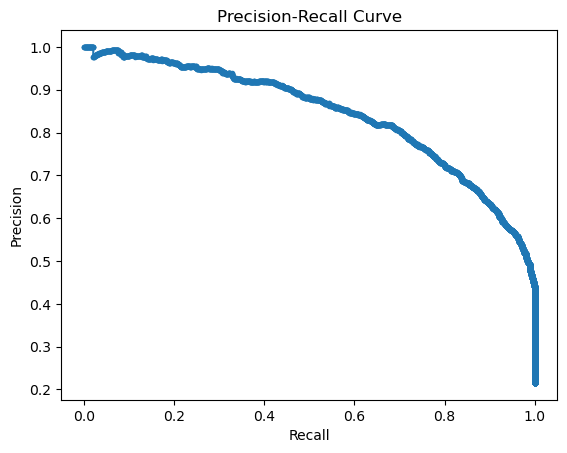

In [64]:
from sklearn.metrics import precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = LR.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
